In [190]:

import os
#tratamiento de datos
#from six import StringIO
#from sklearn.tree import export_graphviz
#import pydotplus
#from pydotplus import graph_from_dot_data
import pandas as pd

#gráfico de datos
import matplotlib.pyplot as plt
import seaborn as sn

#preprocesado y modelado
#from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import classification_report

In [105]:
os.getcwd()

'C:\\Users\\sacha\\Desktop\\PYTHON+R+SQL\\INSTITUTO DATA SCIENCE\\PYTHON\\6- ARBOLES DE DECISION'

In [106]:
os.chdir("C:/Users/sacha/Desktop/PYTHON+R+SQL/INSTITUTO DATA SCIENCE/PYTHON/6- ARBOLES DE DECISION/")

In [107]:
dftrain=pd.read_csv("titanic_train.csv")

In [108]:
dftest=pd.read_csv("titanic_test.csv")

In [109]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass 1=1st, 2=2nd, 3=3rd

sibsp - numero de hermanxs/esposxs abordo del titanic

Parch - numero de padres / hijxs en el titanic

Passenger fare - Tarifa del pasaje

embarked - Puerto de embarcacion

In [110]:
dftrain.shape

(891, 12)

In [111]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
#Modifico la categoria sexo para que sea numerica (en el train y en el test)
dftrain['Sex'] = dftrain['Sex'].replace('female', 0)
dftrain['Sex'] = dftrain['Sex'].replace('male', 1)

dftest['Sex'] = dftest['Sex'].replace('female', 0)
dftest['Sex'] = dftest['Sex'].replace('male', 1)

In [113]:
#tengo un df de test con 900 registros y el test con 418, no cumplo una regla de 80 - 20

In [114]:
dftrain.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


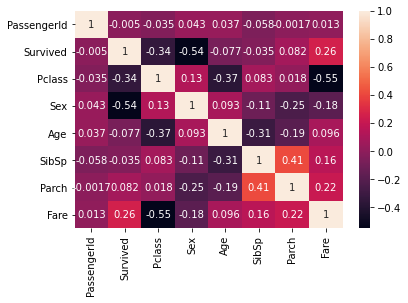

In [115]:
matriz_correlacion = dftrain.corr()
sn.heatmap(matriz_correlacion, annot = True)
plt.show()

In [116]:
dftrain.corr()["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

Hay valores nulos en Age, los voy a completar tomando el valor medio de la edad

In [117]:
dftrain = dftrain.drop(["Cabin"],axis=1)

In [118]:
#dftrain=dftrain.dropna()
dftrain['Age'] = dftrain['Age'].fillna(dftrain['Age'].mean()) #completo los nulos con la media

In [119]:
dftrain.info() #cheque que no haya valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


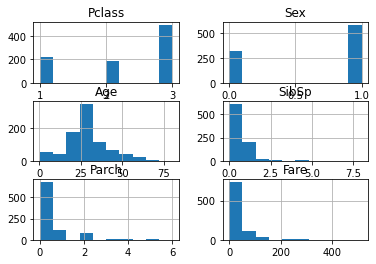

In [120]:
dftrain[["Pclass","Sex","Age","SibSp","Parch","Fare"]].hist()
plt.show()

Voy a probar el arbol de decision con todas las colunas numericas

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(dftrain[["Pclass","Sex","Age","SibSp","Parch","Fare"]], dftrain["Survived"],test_size=0.2, random_state=0)

In [122]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
140,3,0,29.699118,0,2,15.2458
439,2,1,31.000000,0,0,10.5000
817,2,1,31.000000,1,1,37.0042
378,3,1,20.000000,0,0,4.0125
491,3,1,21.000000,0,0,7.2500


In [123]:
Y_train.head(5)

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [126]:
Max_Tree = [0,0]
for depth in range(2,15):
    ClfDT = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    ClfDT.fit(X_train, Y_train)
    Y_predDT = ClfDT.predict(X_test)
    AccuracyDT = accuracy_score(Y_test, Y_predDT)
    print("Accuracy of decision tree with depth {} is: {:.3f} ".format(depth, AccuracyDT))
    if AccuracyDT>Max_Tree[1]:
        Max_Tree[1] = AccuracyDT
        Max_Tree[0] = depth
        Max_Y_predDT = Y_predDT
        Max_ClfDT = ClfDT
print("\033[1mThe best depth for Decision Tree classifier is {}, and it have a accuracy of {:.3f} \033[0m".format(Max_Tree[0], Max_Tree[1]))  

Accuracy of decision tree with depth 2 is: 0.782 
Accuracy of decision tree with depth 3 is: 0.821 
Accuracy of decision tree with depth 4 is: 0.816 
Accuracy of decision tree with depth 5 is: 0.816 
Accuracy of decision tree with depth 6 is: 0.827 
Accuracy of decision tree with depth 7 is: 0.810 
Accuracy of decision tree with depth 8 is: 0.793 
Accuracy of decision tree with depth 9 is: 0.799 
Accuracy of decision tree with depth 10 is: 0.821 
Accuracy of decision tree with depth 11 is: 0.810 
Accuracy of decision tree with depth 12 is: 0.788 
Accuracy of decision tree with depth 13 is: 0.777 
Accuracy of decision tree with depth 14 is: 0.793 
The best depth for Decision Tree classifier is 6, and it have a accuracy of 0.827 


[Text(153.6905172413793, 201.90857142857143, 'X[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(72.87672413793103, 170.84571428571428, 'X[0] <= 2.5\ngini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(23.089655172413792, 139.78285714285715, 'X[2] <= 2.5\ngini = 0.114\nsamples = 132\nvalue = [8, 124]'),
 Text(17.317241379310346, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(28.86206896551724, 108.72, 'X[5] <= 28.856\ngini = 0.101\nsamples = 131\nvalue = [7, 124]'),
 Text(17.317241379310346, 77.65714285714284, 'X[5] <= 28.231\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(11.544827586206896, 46.59428571428572, 'X[2] <= 56.0\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(5.772413793103448, 15.531428571428563, 'gini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(17.317241379310346, 15.531428571428563, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(23.089655172413792, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(40

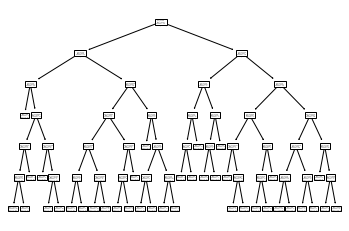

In [52]:
tree.plot_tree(Max_Clf)

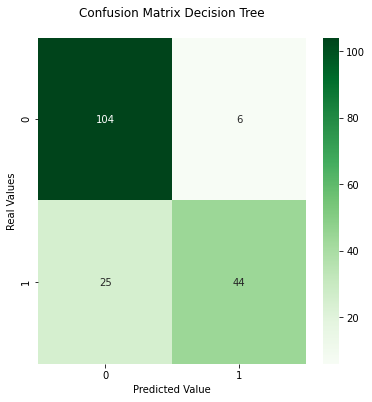

In [131]:
matrixDT = confusion_matrix(Y_test, Max_Y_predDT)

plt.figure(figsize = (6,6))
plt.title("Confusion Matrix Decision Tree\n")

Conf_matrixDT= sn.heatmap(matrixDT, annot=True,fmt="d", cmap = 'Greens')
Conf_matrixDT.set(xlabel='Predicted Value', ylabel='Real Values')
plt.show()

In [191]:
print(classification_report(Y_test, Max_Y_predDT))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       110
           1       0.88      0.64      0.74        69

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.80       179
weighted avg       0.83      0.83      0.82       179



# Naive Bayes Comparison

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
gnb = GaussianNB()

In [81]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [83]:
y_pred_GNB = gnb.predict(X_test)

In [84]:
print (y_pred_GNB)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


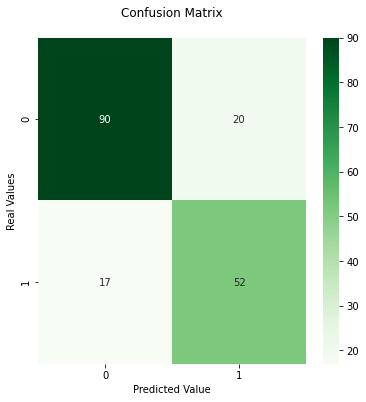

In [99]:
matrixGNB = confusion_matrix(Y_test, y_pred_GNB)

plt.figure(figsize = (6,6))
plt.title("Confusion Matrix GNB\n")

Conf_matrixGNB= sn.heatmap(matrixGNB, annot=True,fmt="d", cmap = 'Greens')
Conf_matrixGNB.set(xlabel='Predicted Value', ylabel='Real Values')
plt.show()

In [89]:
AccuracyGNB = accuracy_score(Y_test, y_pred_GNB)

print("\033[1mAccuracy for Gaussian Navie Bayes is: {:.3f}\033[0m".format(AccuracyGNB))

Accuracy for Gaussian Navie Bayes is: 0.793


In [192]:
print(classification_report(Y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



# K-Nearest-Neighbors 

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [223]:
# Realizando el entrenamiento del dataset con Vecinos Cercanos, iterano para ver la mejor cantidad de vecinos
Min_KN = [0,0]
scores = []
for neighbors in range(2,200):
    classifierKN = KNeighborsClassifier(n_neighbors=neighbors, p=2,
                     weights='distance')
    classifierKN.fit(X_train,Y_train)
    y_pred_KN = classifierKN.predict(X_test)
    AccuracyKN = accuracy_score(Y_test, y_pred_KN)
    AccuracyKN = classifierKN.score(X_test, Y_test)
    scores.append(AccuracyKN)
    print("Accuracy with {} neighbors is: {:.3f} ".format(neighbors, AccuracyKN))
    if AccuracyKN > Min_KN[1]:
        Min_KN[1] = AccuracyKN
        Min_KN[0] = neighbors
        Max_Y_predKN = y_pred_KN
        Max_ClfDT = classifierKN
        
print("\033[1mThe best quantity of neighbours for K-Nearest-Neighbors classifier is {}, and it have a accuracy of {:.3f} \033[0m".format(Min_KN[0], Min_KN[1]))  




Accuracy with 2 neighbors is: 0.693 
Accuracy with 3 neighbors is: 0.704 
Accuracy with 4 neighbors is: 0.709 
Accuracy with 5 neighbors is: 0.732 
Accuracy with 6 neighbors is: 0.732 
Accuracy with 7 neighbors is: 0.737 
Accuracy with 8 neighbors is: 0.726 
Accuracy with 9 neighbors is: 0.732 
Accuracy with 10 neighbors is: 0.732 
Accuracy with 11 neighbors is: 0.749 
Accuracy with 12 neighbors is: 0.743 
Accuracy with 13 neighbors is: 0.754 
Accuracy with 14 neighbors is: 0.754 
Accuracy with 15 neighbors is: 0.749 
Accuracy with 16 neighbors is: 0.754 
Accuracy with 17 neighbors is: 0.760 
Accuracy with 18 neighbors is: 0.765 
Accuracy with 19 neighbors is: 0.765 
Accuracy with 20 neighbors is: 0.765 
Accuracy with 21 neighbors is: 0.765 
Accuracy with 22 neighbors is: 0.777 
Accuracy with 23 neighbors is: 0.777 
Accuracy with 24 neighbors is: 0.765 
Accuracy with 25 neighbors is: 0.771 
Accuracy with 26 neighbors is: 0.771 
Accuracy with 27 neighbors is: 0.777 
Accuracy with 28 nei

C:\Users\sacha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

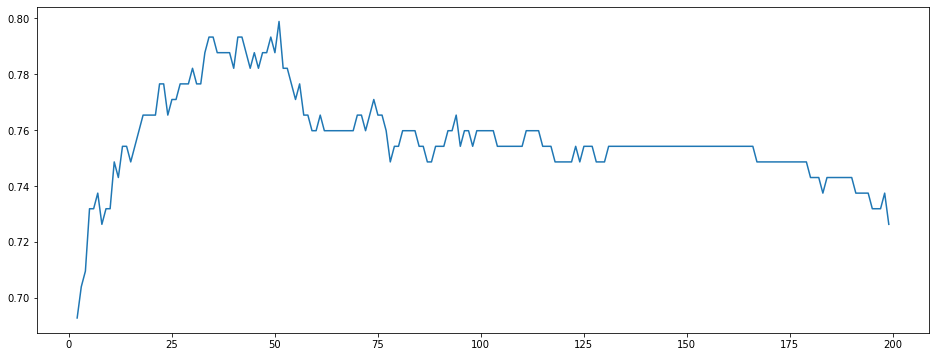

In [222]:
plt.figure(figsize = (16,6))
sn.lineplot(range(2,200), scores)

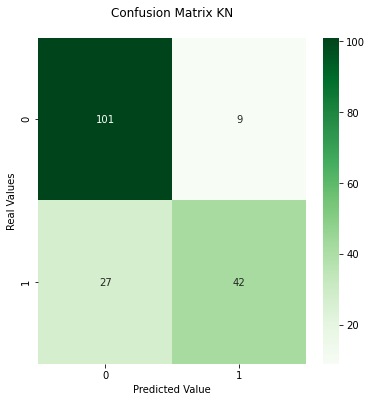

In [224]:
matrixKN = confusion_matrix(Y_test, Max_Y_predKN)

plt.figure(figsize = (6,6))
plt.title("Confusion Matrix KN\n")

Conf_matrixKN= sn.heatmap(matrixKN, annot=True,fmt="d", cmap = 'Greens')
Conf_matrixKN.set(xlabel='Predicted Value', ylabel='Real Values')
plt.show()

In [226]:
print(classification_report(Y_test, Max_Y_predKN))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       110
           1       0.82      0.61      0.70        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179



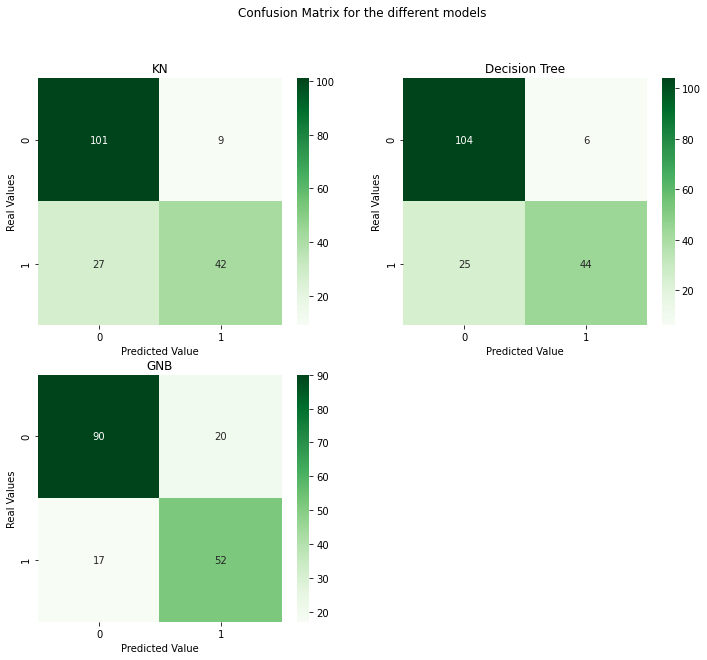

In [227]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)

plt.title("KN")
Conf_matrixKN= sn.heatmap(matrixKN, annot=True,fmt="d", cmap = 'Greens')
Conf_matrixKN.set(xlabel='Predicted Value', ylabel='Real Values')

plt.subplot(2, 2, 2)
plt.title("Decision Tree")
Conf_matrixDT= sn.heatmap(matrixDT, annot=True,fmt="d", cmap = 'Greens')
Conf_matrixDT.set(xlabel='Predicted Value', ylabel='Real Values')

plt.subplot(2, 2, 3)
plt.title("GNB")
Conf_matrixKN= sn.heatmap(matrixGNB, annot=True,fmt="d", cmap = 'Greens')
Conf_matrixKN.set(xlabel='Predicted Value', ylabel='Real Values')

plt.suptitle("Confusion Matrix for the different models")
plt.show()


# Error Type 1 and 2

In [183]:
Error_1=[matrixGNB[0,1], matrixDT[0,1], matrixKN[0,1]]
Error_2=[matrixGNB[1,0], matrixDT[1,0], matrixKN[1,0]]

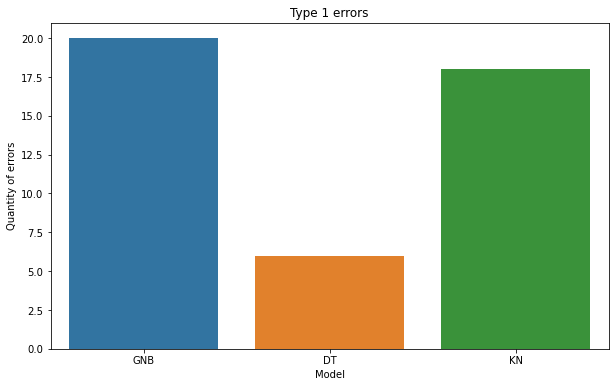

In [195]:
plt.figure(figsize=(10,6))
sn.barplot(y=Error_1,x=["GNB","DT","KN"])
plt.title("Type 1 errors")
plt.ylabel("Quantity of errors")
plt.xlabel("Model")
plt.show()

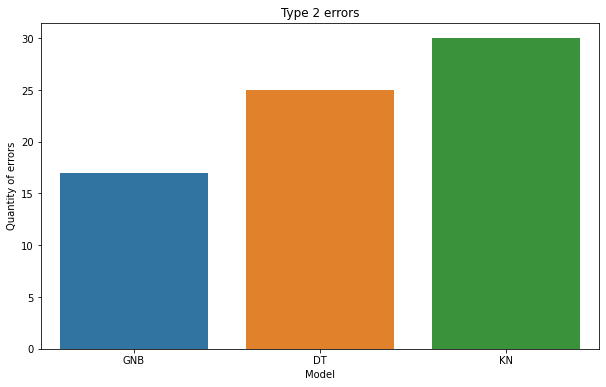

In [230]:
plt.figure(figsize=(10,6))
sn.barplot(y=Error_2,x=["GNB","DT","KN"])
plt.title("Type 2 errors")
plt.ylabel("Quantity of errors")
plt.xlabel("Model")
plt.show()